# Child Mortality Rate Exploration Part 1:
## by Ezra Samuel

## Preliminary Wrangling

This document explores data from some 167 countries between 2000 and 2017. It contains data about child mortality rate as well as data on some factors that may influence it.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from functools import reduce
from random import sample

%matplotlib inline

In [2]:
# loading life expectancy dataset

life_exp = pd.read_csv('life_expectancy_data.csv')
life_exp.head()

,country,year,sanitation,employment_rate,life_expectancy,income,urban_population,life_exp_male
0,Afghanistan,2000,0.235,0.459,54.6,687.0,0.221,54.7
1,Afghanistan,2001,0.235,0.459,54.8,646.0,0.222,55.1
2,Afghanistan,2002,0.246,0.477,55.6,1020.0,0.223,55.6
3,Afghanistan,2003,0.258,0.479,56.4,1060.0,0.224,56.1
4,Afghanistan,2004,0.269,0.475,56.9,1030.0,0.225,56.5


In [3]:
# Displaying dataset info, changer year from int to str datatype

life_exp.info()
life_exp['year'] = life_exp['year'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3222 non-null   object 
 1   year              3222 non-null   int64  
 2   sanitation        3222 non-null   float64
 3   employment_rate   3222 non-null   float64
 4   life_expectancy   3222 non-null   float64
 5   income            3222 non-null   float64
 6   urban_population  3222 non-null   float64
 7   life_exp_male     3222 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 201.5+ KB


In [4]:
# Loading dataset and displaying few dataset info

income = pd.read_csv('worldbank_income_classification.csv')
income.head()

,x,Economy,Code,Region,Income group,Lending category,Other
0,1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
1,2,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
2,3,Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,NaN
3,4,American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN
4,5,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [5]:
# Loading dataset, renaming columns and displaying few dataset info

income = income.drop(['x', 'Code', 'Lending category', 'Other'], axis = 1)
income.rename(columns = {'Economy': 'country', 'Region': 'region', 'Income group': 'income_group'}, inplace = True)
income.head()

,country,region,income_group
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Upper middle income
3,American Samoa,East Asia & Pacific,Upper middle income
4,Andorra,Europe & Central Asia,High income


In [6]:
# Loading dataset and displaying few dataset info

mortality = pd.read_csv('child_mortality.csv')
mortality.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,351.0,345.0,340.0,335.0,330.0,324.0,319.0,314.0,...,91.9,88.0,84.1,80.5,76.9,73.6,70.4,67.5,64.7,62.3
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.4,13.3,12.3,11.4,10.7,10.0,9.6,9.3,9.0,8.8
2,Algeria,243.0,243.0,243.0,245.0,246.0,246.0,247.0,247.0,246.0,...,28.3,27.4,26.7,26.1,25.7,25.3,24.9,24.5,24.0,23.5
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,4.2,4.0,3.8,3.6,3.4,3.3,3.1,3.0,2.9
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.0,121.0,113.0,105.0,98.4,92.9,88.1,84.0,80.4,77.2


In [7]:
# merging dataframes

mortality = pd.merge(income, mortality, how='inner', on='country')
mortality.head()

,country,region,income_group,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,South Asia,Low income,NaN,351.0,345.0,340.0,335.0,330.0,324.0,...,91.9,88.0,84.1,80.5,76.9,73.6,70.4,67.5,64.7,62.3
1,Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.4,13.3,12.3,11.4,10.7,10.0,9.6,9.3,9.0,8.8
2,Algeria,Middle East & North Africa,Upper middle income,243.0,243.0,243.0,245.0,246.0,246.0,247.0,...,28.3,27.4,26.7,26.1,25.7,25.3,24.9,24.5,24.0,23.5
3,Andorra,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,4.2,4.0,3.8,3.6,3.4,3.3,3.1,3.0,2.9
4,Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.0,121.0,113.0,105.0,98.4,92.9,88.1,84.0,80.4,77.2


In [8]:
# reshaping data

mortality = mortality.melt(id_vars = ['country', 'region', 'income_group'], var_name = 'year', value_name = 'child_mortality')
mortality.head()

,country,region,income_group,year,child_mortality
0,Afghanistan,South Asia,Low income,1960,NaN
1,Albania,Europe & Central Asia,Upper middle income,1960,NaN
2,Algeria,Middle East & North Africa,Upper middle income,1960,243.0
3,Andorra,Europe & Central Asia,High income,1960,NaN
4,Angola,Sub-Saharan Africa,Lower middle income,1960,NaN


In [9]:
# rearranging data columns

mortality = mortality[['country', 'year', 'child_mortality', 'income_group', 'region']]
mortality.head()

,country,year,child_mortality,income_group,region
0,Afghanistan,1960,NaN,Low income,South Asia
1,Albania,1960,NaN,Upper middle income,Europe & Central Asia
2,Algeria,1960,243.0,Upper middle income,Middle East & North Africa
3,Andorra,1960,NaN,High income,Europe & Central Asia
4,Angola,1960,NaN,Lower middle income,Sub-Saharan Africa


In [10]:
# Loading dataset and displaying few dataset info

adolescent_fert = pd.read_csv('adolescent_fertility.csv')
adolescent_fert.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,...,120.0,114.0,107.0,101.0,94.4,88.1,81.7,75.3,69.0,65.10
1,Albania,54.4,56.2,57.9,55.4,52.8,50.3,47.8,45.3,42.1,...,19.4,19.8,20.3,20.7,20.5,20.3,20.1,19.9,19.6,19.60
2,Algeria,124.0,125.0,126.0,124.0,121.0,119.0,117.0,115.0,113.0,...,10.4,10.8,11.2,11.6,11.3,11.0,10.7,10.4,10.1,9.83
3,Angola,202.0,205.0,207.0,209.0,212.0,214.0,217.0,219.0,220.0,...,176.0,173.0,170.0,167.0,164.0,161.0,157.0,154.0,151.0,148.00
4,Antigua and Barbuda,180.0,178.0,177.0,174.0,172.0,169.0,167.0,164.0,158.0,...,49.5,48.7,47.8,47.0,46.2,45.3,44.5,43.6,42.8,41.80


In [11]:
# reshaping data

adolescent_fert = adolescent_fert.melt(id_vars='country', var_name='year', value_name='adolescent_fertility')
adolescent_fert.head()

,country,year,adolescent_fertility
0,Afghanistan,1960,145.0
1,Albania,1960,54.4
2,Algeria,1960,124.0
3,Angola,1960,202.0
4,Antigua and Barbuda,1960,180.0


In [12]:
# Loading dataset and displaying few dataset info

immunization = pd.read_csv('dtp_immunization.csv')
immunization.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.0,3.0,5.0,5.0,16.0,15.0,11.0,25.0,35.0,...,63.0,66.0,68,67,64,62,65,66,66,66
1,Albania,94.0,94.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,...,98.0,99.0,99,99,99,98,99,98,99,99
2,Algeria,NaN,NaN,NaN,NaN,NaN,69.0,73.0,79.0,85.0,...,95.0,95.0,95,95,95,95,95,91,91,91
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99,99,96,97,97,98,99,99
4,Angola,NaN,NaN,NaN,6.0,8.0,8.0,10.0,10.0,12.0,...,34.0,52.0,46,52,54,55,55,55,52,59


In [13]:
# reshaping data

immunization = immunization.melt(id_vars='country', var_name='year', value_name='immunization')
immunization.head()

,country,year,immunization
0,Afghanistan,1980,4.0
1,Albania,1980,94.0
2,Algeria,1980,NaN
3,Andorra,1980,NaN
4,Angola,1980,NaN


In [14]:
final_data = [life_exp, mortality, adolescent_fert, immunization]

In [15]:
# merging data

final_data = reduce(lambda left,right: pd.merge(left,right,on=['country', 'year']), final_data)
final_data = final_data.drop(['income', 'life_exp_male'], axis = 1)
final_data.head()

,country,year,sanitation,employment_rate,life_expectancy,urban_population,child_mortality,income_group,region,adolescent_fertility,immunization
0,Afghanistan,2000,0.235,0.459,54.6,0.221,129.0,Low income,South Asia,154.0,24.0
1,Afghanistan,2001,0.235,0.459,54.8,0.222,125.0,Low income,South Asia,150.0,33.0
2,Afghanistan,2002,0.246,0.477,55.6,0.223,121.0,Low income,South Asia,146.0,36.0
3,Afghanistan,2003,0.258,0.479,56.4,0.224,117.0,Low income,South Asia,144.0,41.0
4,Afghanistan,2004,0.269,0.475,56.9,0.225,113.0,Low income,South Asia,141.0,50.0


In [16]:

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               3006 non-null   object 
 1   year                  3006 non-null   object 
 2   sanitation            3006 non-null   float64
 3   employment_rate       3006 non-null   float64
 4   life_expectancy       3006 non-null   float64
 5   urban_population      3006 non-null   float64
 6   child_mortality       3006 non-null   float64
 7   income_group          3006 non-null   object 
 8   region                3006 non-null   object 
 9   adolescent_fertility  3006 non-null   float64
 10  immunization          2987 non-null   float64
dtypes: float64(7), object(4)
memory usage: 281.8+ KB


In [17]:
# assessing 5 rows with mo value for immunization
nan_val = final_data.query('immunization != immunization')
nan_val.sample(5)

,country,year,sanitation,employment_rate,life_expectancy,urban_population,child_mortality,income_group,region,adolescent_fertility,immunization
2451,South Sudan,2003,0.701423,0.653,55.8,0.169,157.0,Low income,Sub-Saharan Africa,116.0,NaN
1766,Montenegro,2002,0.701423,0.358,74.2,0.606,13.0,Upper middle income,Europe & Central Asia,16.5,NaN
2448,South Sudan,2000,0.701423,0.655,54.4,0.165,183.0,Low income,Sub-Saharan Africa,124.0,NaN
2664,Timor-Leste,2000,0.701423,0.530,65.3,0.243,108.0,Lower middle income,East Asia & Pacific,61.6,NaN
1765,Montenegro,2001,0.701423,0.361,74.0,0.596,13.6,Upper middle income,Europe & Central Asia,17.6,NaN


One of the countries with Nan values is South Sudan, which was not a Country at the time. Hence, I had to remove the rows with NaN values

In [18]:
final_data = final_data.dropna()
final_data = final_data.reset_index(drop = True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2987 non-null   object 
 1   year                  2987 non-null   object 
 2   sanitation            2987 non-null   float64
 3   employment_rate       2987 non-null   float64
 4   life_expectancy       2987 non-null   float64
 5   urban_population      2987 non-null   float64
 6   child_mortality       2987 non-null   float64
 7   income_group          2987 non-null   object 
 8   region                2987 non-null   object 
 9   adolescent_fertility  2987 non-null   float64
 10  immunization          2987 non-null   float64
dtypes: float64(7), object(4)
memory usage: 256.8+ KB


In [19]:
final_data.country.unique().shape

(167,)

In [20]:
final_data.income_group.value_counts()

Upper middle income    948
High income            882
Lower middle income    664
Low income             493
Name: income_group, dtype: int64

In [21]:
final_data.region.value_counts()

Europe & Central Asia         858
Sub-Saharan Africa            727
Latin America & Caribbean     522
East Asia & Pacific           358
Middle East & North Africa    342
South Asia                    144
North America                  36
Name: region, dtype: int64

In [22]:
# identifying ordered variables in the data
ordinal_var = {'income_group': ['Low income', 'Lower middle income', 'Upper middle income', 
                                     'High income']}

for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var[var])
    final_data[var] = final_data[var].astype(ordered_var)

### What is the structure of your dataset?

The dataset consists of 2987 rows of data from 167 countries over an 18-year period. It has 11 columns (country, year, sanitation, employment_rate, life_expectancy, urban_population, child_mortality, income_group, region, adolescent_fertility, and immunization). Of the 11 variables, 7 are numeric, 2 are nomimal(country and region), and 2 are ordinal(year and income_group).

income_group is arranged in ascending order as: Low income, Lower middle income, Upper middle income, High income.

### What is/are the main feature(s) of interest in your dataset?

My interest is to identify features that are most associated with child mortality rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect immunization, adolescent_fertility to have the strongest effect on child mortality rate. Other factors like income_group and sanitation will have effects on child mortality rate as well. 

## Univariate Exploration

Let me begin with looking at the distribution of our variable of interest: child_mortality

In [23]:
final_data.describe()

,sanitation,employment_rate,life_expectancy,urban_population,child_mortality,adolescent_fertility,immunization
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000
mean,0.711594,0.575038,70.382993,0.559453,41.219049,55.545872,86.596920
std,0.306818,0.113244,8.807544,0.230515,44.192352,46.254438,15.537207
min,0.034000,0.289000,32.500000,0.082500,1.800000,1.380000,6.000000
25%,0.454000,0.500000,64.450000,0.361000,8.350000,17.050000,82.000000
50%,0.859000,0.576000,72.700000,0.562000,21.600000,44.100000,93.000000
75%,0.977000,0.644000,77.100000,0.757500,63.750000,82.000000,97.000000
max,1.000000,0.878000,84.800000,1.000000,234.000000,217.000000,99.000000


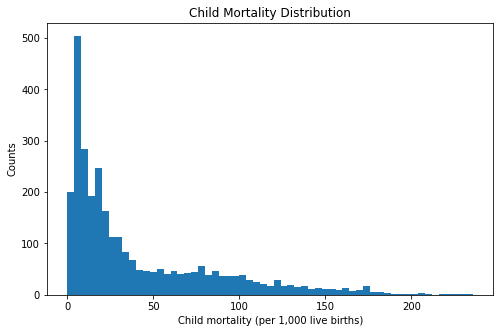

In [24]:
# plotting a histogram
binsize = 4
bins = np.arange(0, final_data['child_mortality'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'child_mortality', bins = bins);
plt.xlabel('Child mortality (per 1,000 live births)');
plt.ylabel('Counts');
plt.title('Child Mortality Distribution');

The histogram is skewed to the right with most values between 0 - 50. Let's use the log scale to explore further.

In [25]:
log_data = np.log10(final_data['child_mortality'])
log_data.describe()

count    2987.000000
mean        1.348759
std         0.508614
min         0.255273
25%         0.921679
50%         1.334454
75%         1.804480
max         2.369216
Name: child_mortality, dtype: float64

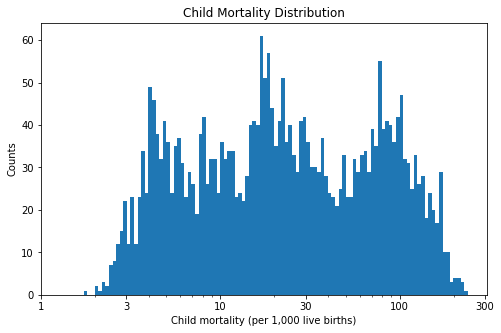

In [26]:
# histogram plot on a log scale

log_binsize = 0.02
bins = 10 ** np.arange(0.2, log_data.max()+log_binsize, log_binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'child_mortality', bins = bins);
plt.xscale('log');
plt.xticks([1, 3, 10, 30, 100, 300], [1, 3, 10, 30, 100, 300]);
plt.xlabel('Child mortality (per 1,000 live births)');
plt.ylabel('Counts');
plt.title('Child Mortality Distribution');

Plotting the child_mortality on a log scale shows the distrbution as roughly trimodal(having three modes). The first peak is somewhere between 3 and 10, the second between is below 30 and the last peak around the 100.

We will next examine the distribution of one of our core predictor variable: immunization.

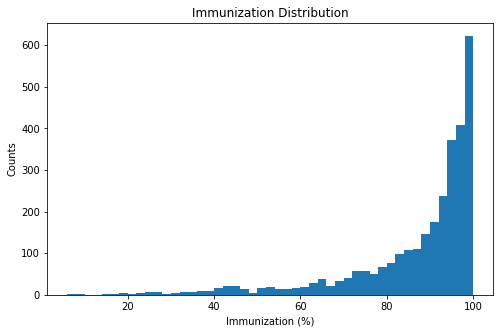

In [27]:
# histogram plot

binsize = 2
bins = np.arange(6, final_data['immunization'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'immunization', bins = bins);
plt.xlabel('Immunization (%)');
plt.ylabel('Counts');
plt.title('Immunization Distribution');

The plot is highly skewed to the left, with most of the values falling between 80 and 100. The shape is roughly opposite of the child_mortality rate shape we saw earlier. Could it be both variables are negatively correlated?

Althogh most of the values are centered at the far right, the log transformation does not seem to have much effect on the distribution. This is apparently because of the left skewed distribution.

Next, we will examine the sanitation variable.

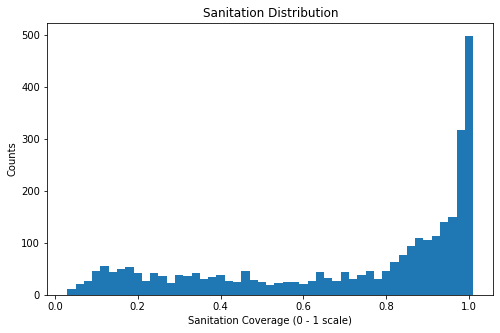

In [28]:
# histogram plot

binsize = 0.02
bins = np.arange(0.03, final_data['sanitation'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'sanitation', bins = bins);
plt.xlabel('Sanitation Coverage (0 - 1 scale)');
plt.ylabel('Counts');
plt.title('Sanitation Distribution');

The sanitation variable is skewed to the left. There is slightly high concentration of values before 0.2, else, values to the left are few until 0.8 where distribution steadily raises. Much of the values are around 1.0. Could the sanitation variable be negatively correlated with child_mortality?

Let us check out the distribution of adolescent_fertility - another factor I think will have some effect on child mortality.

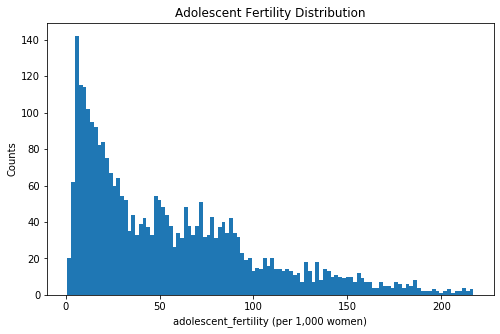

In [29]:
# histogram plot

binsize = 2
bins = np.arange(1, final_data['adolescent_fertility'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'adolescent_fertility', bins = bins);
plt.xlabel('adolescent_fertility (per 1,000 women)');
plt.ylabel('Counts');
plt.title('Adolescent Fertility Distribution');

The distribution of adolescent_fertility is skewed to the right. Most of the values are concentrated between 0 and 100. Let me use log axis transformation to assess the distribution more.

In [30]:
log_data = np.log10(final_data['adolescent_fertility'])
log_data.describe()

count    2987.000000
mean        1.560200
std         0.441885
min         0.139879
25%         1.231723
50%         1.644439
75%         1.913814
max         2.336460
Name: adolescent_fertility, dtype: float64

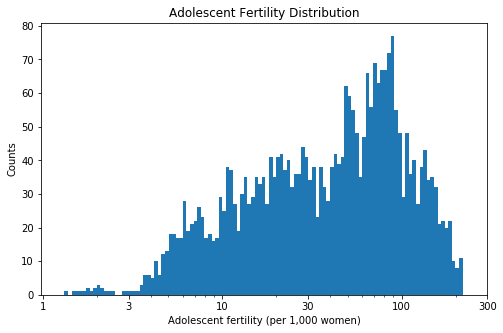

In [31]:
log_binsize = 0.02
log_data = np.log10(final_data['adolescent_fertility'])
bins = 10 ** np.arange(0.1, log_data.max()+log_binsize, log_binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'adolescent_fertility', bins = bins);
plt.xscale('log');
plt.xticks([1, 3, 10, 30, 100, 300], [1, 3, 10, 30, 100, 300]);
plt.xlabel('Adolescent fertility (per 1,000 women)');
plt.ylabel('Counts');
plt.title('Adolescent Fertility Distribution');

With the transform, the distribution now is roughly unimodal, with the peak before 100. The distribution is skewed to the left. There is a cut-off before 3 and the values there are quite few. Might they be outliers? I do not think so as the value difference is minimal. Let me just assess to clarify.

In [32]:
#checking for outliers
outliers = final_data['adolescent_fertility'] <= 2
final_data.loc[outliers,:]

,country,year,sanitation,employment_rate,life_expectancy,urban_population,child_mortality,income_group,region,adolescent_fertility,immunization
2431,South Korea,2007,1.0,0.599,79.7,0.816,4.8,High income,East Asia & Pacific,2.00,91.0
2432,South Korea,2008,1.0,0.595,80.1,0.817,4.5,High income,East Asia & Pacific,1.95,94.0
2433,South Korea,2009,1.0,0.584,80.4,0.818,4.3,High income,East Asia & Pacific,1.91,94.0
2434,South Korea,2010,1.0,0.585,80.6,0.819,4.1,High income,East Asia & Pacific,1.86,94.0
2435,South Korea,2011,1.0,0.588,80.9,0.819,4.0,High income,East Asia & Pacific,1.81,99.0
2436,South Korea,2012,1.0,0.592,81.2,0.819,3.8,High income,East Asia & Pacific,1.77,99.0
2437,South Korea,2013,1.0,0.594,81.6,0.818,3.7,High income,East Asia & Pacific,1.69,99.0
2438,South Korea,2014,1.0,0.601,82.0,0.817,3.6,High income,East Asia & Pacific,1.61,99.0
2439,South Korea,2015,1.0,0.602,82.3,0.816,3.5,High income,East Asia & Pacific,1.53,98.0
2440,South Korea,2016,1.0,0.603,82.5,0.816,3.4,High income,East Asia & Pacific,1.46,98.0


All the values come from one country, and the entire values look prety consistent. As I thought, those values are fine.

Next is life expectancy plot.

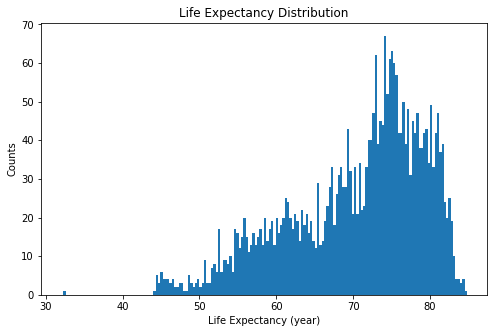

In [33]:
#histogram plot

binsize = 0.3
bins = np.arange(32, final_data['life_expectancy'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'life_expectancy', bins = bins);
plt.xlabel('Life Expectancy (year)');
plt.ylabel('Counts');
plt.title('Life Expectancy Distribution');

The life_expectancy distribution is skewed to the left. Most of the values are concentrated between 70 and 80. We can see an outlier after 30 and a wide gap between that point and the rest of the values. Are the more outliers? Is that a true value or an error in entry? Let me find out.

In [34]:
outlier = final_data['life_expectancy'] < 43
final_data.loc[outlier,:]

,country,year,sanitation,employment_rate,life_expectancy,urban_population,child_mortality,income_group,region,adolescent_fertility,immunization
1126,Haiti,2010,0.272,0.554,32.5,0.475,209.0,Low income,Latin America & Caribbean,59.5,67.0


In [35]:
final_data.query('country == "Haiti"')['life_expectancy']

1116    57.4
1117    57.9
1118    58.5
1119    58.9
1120    58.8
1121    59.8
1122    60.2
1123    60.6
1124    60.9
1125    61.5
1126    32.5
1127    61.6
1128    62.5
1129    63.1
1130    63.6
1131    64.0
1132    64.3
1133    65.0
Name: life_expectancy, dtype: float64

Obviously the outlier is an error. The life_expectancy for previous and subsequent years for that country are way higher. 

Though this is just a single value, I think it is safe to remove it from the data.

In [36]:
final_data = final_data.loc[-outlier,:]

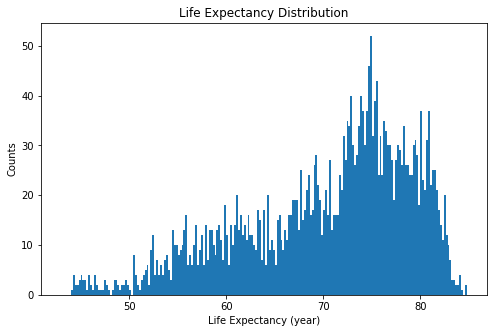

In [37]:
binsize = 0.2
bins = np.arange(43, final_data['life_expectancy'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = final_data, x = 'life_expectancy', bins = bins);
plt.xlabel('Life Expectancy (year)');
plt.ylabel('Counts');
plt.title('Life Expectancy Distribution');

With the outlier removed, the distribution is still the same except for the fact that the is no longer a gap between the least and the remaining values.

Next, I will assess the last two numeric variables: employment_rate and urban_population.

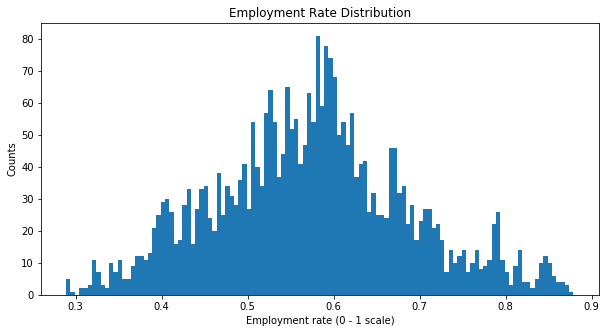

In [38]:
# histogram plot
binsize = 0.005
bins = np.arange(final_data['employment_rate'].min(), final_data['employment_rate'].max()+binsize, binsize)

plt.figure(figsize = [10, 5]);
plt.hist(data = final_data, x = 'employment_rate', bins = bins);
plt.xlabel('Employment rate (0 - 1 scale)');
plt.ylabel('Counts');
plt.title('Employment Rate Distribution');

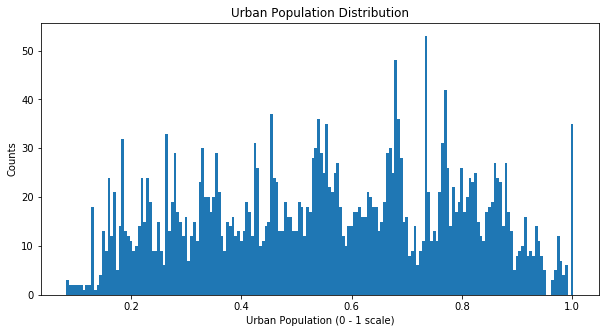

In [39]:
#histogram plot

binsize = 0.005
bins = np.arange(final_data['urban_population'].min(), final_data['urban_population'].max()+binsize, binsize)

plt.figure(figsize = [10, 5]);
plt.hist(data = final_data, x = 'urban_population', bins = bins);
plt.xlabel('Urban Population (0 - 1 scale)');
plt.ylabel('Counts');
plt.title('Urban Population Distribution');

The distribution of the employment_rate variable is roughly normal. It peaks around the center of the values.

The urban_population distribution in the dataset is fairly uniform with several spikes across the distribution. 

Finally, I will examine the categorical variables: income_group and region. Number of values is same every year and region is a lot easier to work with than country. Hence, year and country wont be assessed.

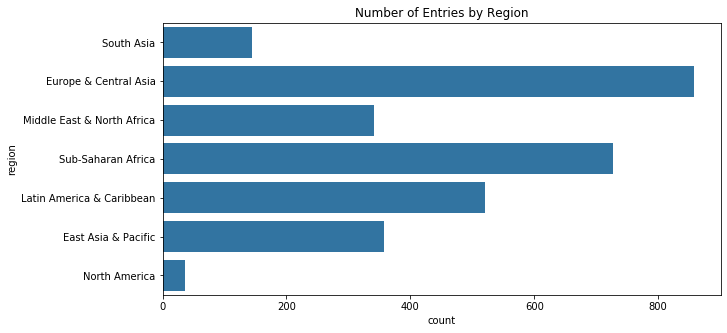

In [40]:
# horizontal bar plot of region

plt.figure(figsize = [10, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = final_data, y = 'region', 
             color = default_color);
plt.title('Number of Entries by Region');

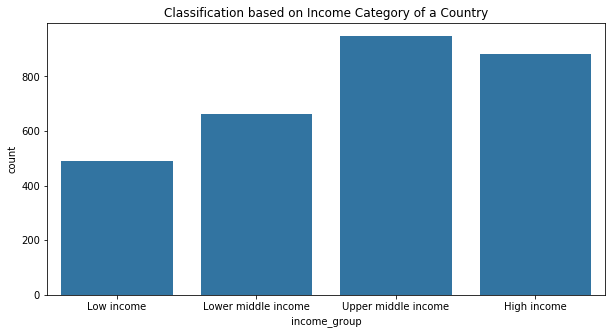

In [41]:
# bar plot of income_group

plt.figure(figsize = [10, 5])
sb.countplot(data = final_data, x = 'income_group', 
             color = default_color);
plt.title('Classification based on Income Category of a Country');


A lot more countries are in Europe & Central Asia and Sub-Saharan Africa than the other regions. The distribution has fewer data from the North America and South Asia Regions.

On the other hand, there are more 'Upper middle income' and 'High income' than 'Lower middle income' and 'Low income' in the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My variable of interest 'child_mortality' had a relatively long range of values - somewhere around 0 to beyond 200. Most values were concentrated at the between 0 and 50. I used the long transform to assess the data. Under the log transform, the distribution was trimodal with peaks somewhere after 3, between 10 and 30, and around 100 of child mortality per 1000 live births.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I noticed a small break in value for the adolescent_fertility variable. Further assessment showed that the values involed are consistent - the little break is apparently as a result of small bin size.

On the other hand, I noticed an outlier in the life_expectancy variable. On further investigation, I noticed that it must have been an erroneous value as it was totally out of line with corresponding figures. This value, although consisting of just one row was removed from the dataset.

## Bivariate Exploration

In this section, I will be investigating relationships between variable pairs, particularly how each of them relate to child mortality. Let me begin with assessing the relationship between child mortality and adolescent_fertility with a scatterplot.

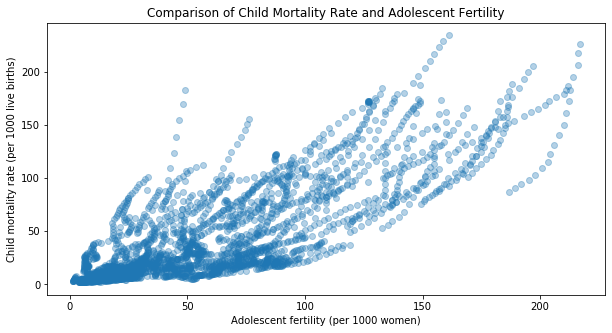

In [42]:
plt.figure(figsize = [10, 5])
sb.regplot(data = final_data, x = 'adolescent_fertility', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/3});

plt.xlabel('Adolescent fertility (per 1000 women)');
plt.ylabel('Child mortality rate (per 1000 live births)');
plt.title('Comparison of Child Mortality Rate and Adolescent Fertility');

As seen in the plot, there is a possitive correlation between adolescent fertility and child mortality rate. A lot of values tend to cluster before 100. Woudn't it be nice to see what it will look like on a log scale? Let me try that out.

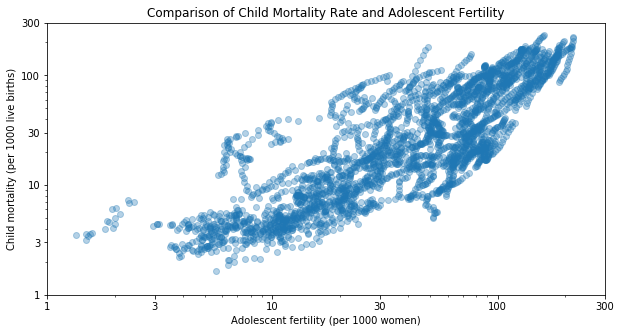

In [43]:
# Using my previous log scale
plt.figure(figsize = [10, 5])

x_bins = 10**np.arange(0.1, log_data.max()+0.02, 0.02)
y_bins = 10**np.arange(0.1, log_data.max()+0.02, 0.02)
ticks = [1, 3, 10, 30, 100, 300]
sb.regplot(data = final_data, x = 'adolescent_fertility', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/3});
plt.xscale('log')
plt.yscale('log');
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks);
plt.xlabel('Adolescent fertility (per 1000 women)');
plt.ylabel('Child mortality (per 1000 live births)');
plt.title('Comparison of Child Mortality Rate and Adolescent Fertility');

With the log scale, we can see the values well spread out with clusters at intermitent points. There are a lot of values around 100 but few values less than 3 in both axes. 

Next, let me use a heat map to assess the relationship of another variable I think will have much correlation  with child mortality rate.

In [44]:
final_data[['immunization']].describe()

,immunization
count,2986.000000
mean,86.603483
std,15.535667
min,6.000000
25%,82.000000
50%,93.000000
75%,97.000000
max,99.000000


In [45]:
log_data = np.log10(final_data['child_mortality'])
log_data.describe()

count    2986.000000
mean        1.348434
std         0.508388
min         0.255273
25%         0.920378
50%         1.334454
75%         1.804139
max         2.369216
Name: child_mortality, dtype: float64

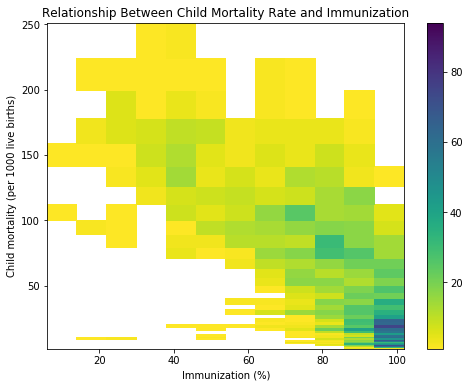

In [46]:
#heat map of child_mortality and immunization
plt.figure(figsize= [8, 6])
bins_x = np.arange(6, 99 + 8, 8)
bins_y = 10 ** np.arange(0.2, log_data.max()+0.05, 0.05)
plt.hist2d(data = final_data, x = 'immunization', y = 'child_mortality', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel('Immunization (%)');
plt.ylabel('Child mortality (per 1000 live births)');
plt.title('Relationship Between Child Mortality Rate and Immunization');

The heat map is set such that any cell without count don't get colored in. The visualization shows that most figures fall in a line where high immunization correlate with low child mortality rate (negative correlation). A lot of the values are centered around 100 for immunization and towards 0 of child mortality. Doesn't this correlation seem logical?

I will now plot the remaining numerical variables with child mortality rate on a scatter plot to explore their relationships.

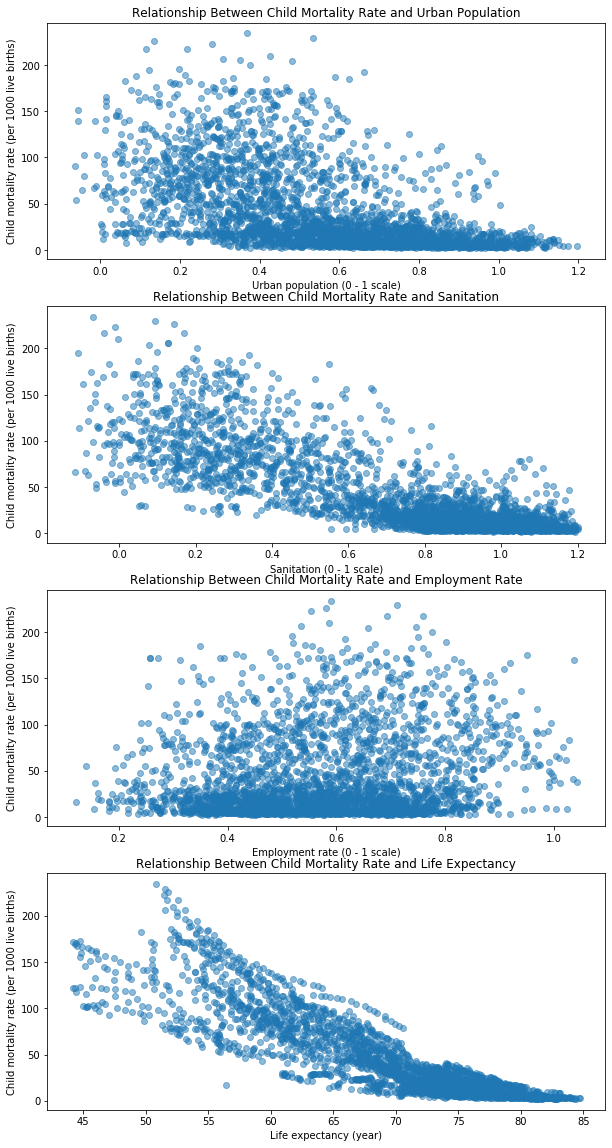

In [47]:
fig, ax = plt.subplots(nrows=4, figsize = [10, 20]);

sb.regplot(data = final_data, x = 'urban_population', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/2} , ax = ax[0]);
ax[0].set_title('Relationship Between Child Mortality Rate and Urban Population')
ax[0].set_xlabel('Urban population (0 - 1 scale)')
ax[0].set_ylabel('Child mortality rate (per 1000 live births)')

sb.regplot(data = final_data, x = 'sanitation', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/2} , ax = ax[1]);
ax[1].set_title('Relationship Between Child Mortality Rate and Sanitation')
ax[1].set_xlabel('Sanitation (0 - 1 scale)')
ax[1].set_ylabel('Child mortality rate (per 1000 live births)')

sb.regplot(data = final_data, x = 'employment_rate', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/2} , ax = ax[2]);
ax[2].set_title('Relationship Between Child Mortality Rate and Employment Rate')
ax[2].set_xlabel('Employment rate (0 - 1 scale)')
ax[2].set_ylabel('Child mortality rate (per 1000 live births)')

sb.regplot(data = final_data, x = 'life_expectancy', y = 'child_mortality', x_jitter = 0.2,
          y_jitter = 0.2, fit_reg = False, scatter_kws = {'alpha': 1/2} , ax = ax[3]);
ax[3].set_title('Relationship Between Child Mortality Rate and Life Expectancy');
ax[3].set_xlabel('Life expectancy (year)');
ax[3].set_ylabel('Child mortality rate (per 1000 live births)');


From the scatterplots above, I notice some interesting details about the four numeric variables plotted with child mortality rate on the y axis. At a high life expectancy value, child mortality is near zero. It peaks with decreasing life expectancy (negative correlation). Sanitation also has a strong negative correlation with child mortality rate. Urban population has a moderate negative corretion too. Employment rate does not seem to have a noticable correlation with child mortality from the scatter plot. These are interesting observations that will be assessed further in the next section.

Now, let me give attention to the two categorical variables I will need for this analysis - income_group and region. Let me first use a violin plot to assess income_group with numerical variables that show a strong correlation with child mortality rate.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x360 with 0 Axes>

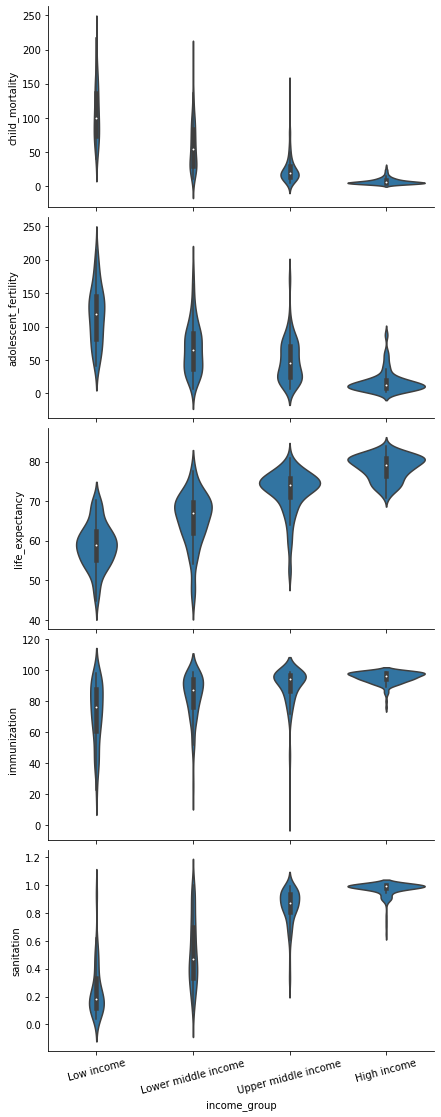

In [48]:
# violin plot of numerical and categorical variables
list1 = final_data['year'].tolist()  

for i in range(len(list1)):
    var = sample(list1, 3)
    data_sample = final_data[final_data['year'].isin(['{}'.format(var[0]), '{}'.format(var[1]), '{}'.format(var[2])])]
    break
data_sample = data_sample

def violingrid(x, y, **kwargs):
    default_color = sb.color_palette()[0];
    sb.violinplot(x, y, color = default_color);
    plt.xticks(rotation = 15);

plt.figure(figsize = [10, 5]);
g = sb.PairGrid(data = data_sample, y_vars = ['child_mortality', 'adolescent_fertility',
                                             'life_expectancy', 'immunization', 'sanitation'], 
                x_vars = 'income_group', size = 3, aspect = 2);

g.map(violingrid);

Above are violin plots of the variable of interest 'child_mortality' and four other numeric variables with categorical variables.

In all five plots, the ordinal variable (income_group) follow a trend. Child mortality and adolescent fertility are highest in Low income countries and least in High income countries in that order. On the other hand, life expectancy, immunization, and sanitation are highest in High income group and gradually drops to the least income group.
What does this suggest? income_group tend to have a strong relationship with our variable of interest as well as the other variables selected for this analysis. 

How about the other categorical variable 'region'? Let me use a box plot to assess it along with the numeric variables.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x360 with 0 Axes>

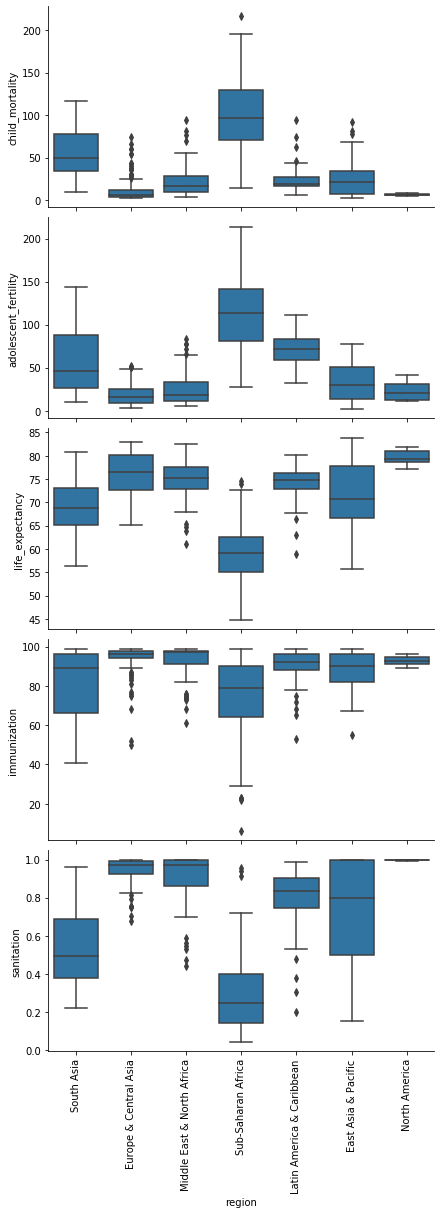

In [49]:
# box plot of numerical and categorical variables
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);
    plt.xticks(rotation = 90);

plt.figure(figsize = [10, 5]);
g = sb.PairGrid(data = data_sample, y_vars = ['child_mortality', 'adolescent_fertility',
                                             'life_expectancy', 'immunization', 'sanitation'], 
                x_vars = 'region', size = 3, aspect = 2);
g.map(boxgrid);


The box plot of 'region' show a trend similar to what I observed in the violin plot. Europe & Central Asia and North America regions have the least child mortality rate and low adolescent fertility ratio, but have highest life expectancy, immunization, and sanitation. Sub-Saharan Africa have all that in the reverse order. That sure reveals an interesting thing about the two categorical values. Are Europe & Central Asia and North America associated with high income countries, and is Sub-Saharan Africa having largely low income countries?

I know a plot that can easily reveal such a trend in categorical variables. It is the next plot.

In [50]:
ct_counts = final_data.groupby(['income_group', 'region']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts.pivot(index = 'region', columns = 'income_group', values = 'count')

income_group,Low income,Lower middle income,Upper middle income,High income
region,,,,
East Asia & Pacific,0,160,108,90
Europe & Central Asia,18,72,264,504
Latin America & Caribbean,17,72,324,108
Middle East & North Africa,18,72,108,144
North America,0,0,0,36
South Asia,36,72,36,0
Sub-Saharan Africa,403,216,108,0


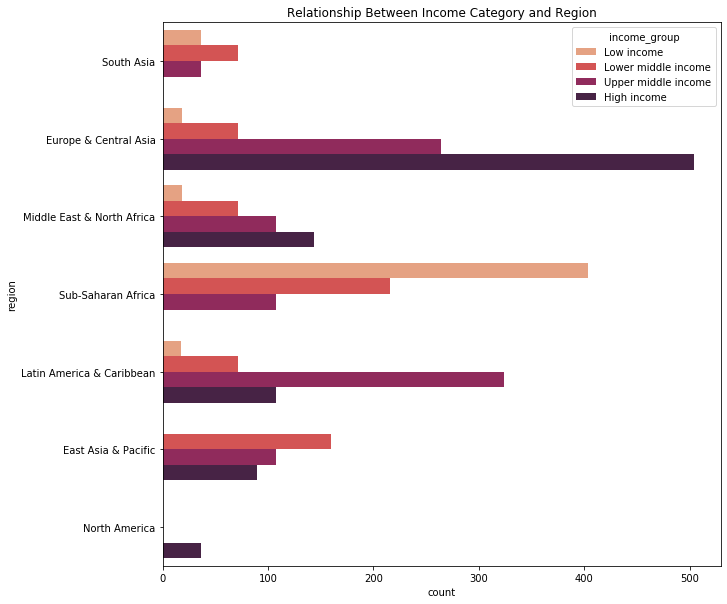

In [51]:
plt.figure(figsize = [10, 10]);
sb.countplot(data = final_data, y = 'region', hue = 'income_group', palette = 'rocket_r');
plt.title('Relationship Between Income Category and Region');

What does this plot reveal?
Most countries in Europe & Central Asia are in the High income group as well as the countries in North America. Also, majority of countries in Sub-Saharan Africa are in the Low income group, with none in the High income group.

As seen in the earlier plot, high child mortality rate is associated with Low income regions like Sub-Saharan Africa.

This plot also reveals an overwhelming number of entries from Europe & Central Asia compared to just a few from North America.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The variable of interest was child mortality rate (child_mortality). With reference to numeric variable, the heat map and scatter plots suggested strong negative correlation between child mortality rate and life_expectancy, sanitation and immunization. The variable 'urban population' has a wmoderate negative correlation, while employment rate does not seem to have a correlation with child mortality. 

An intersting relationship was observed between child mortality rate and the categorical variables. High child mortality rate was associated with low income countries and the Sub-Saharan Africa region. Low child mortality rate was particularly associated with high income countries and countries in Europe & Central Asia, and North America.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

High income group showed a possitive relationship with life_expectancy, sanitation, and immunization while Low income group was associated with adolescent_fertility. Also, High income group was associated with Europe & Central Asia and North america while Sub-Saharan Africa was largely associated with Low income.

## Multivariate Exploration

In this section, I will be creating plots of three or more variables to continue exploring trends in the dataset.

Let me begin with plotting a heat map of all the numerical variables in the data. I will be able to see how these variables relate with not just the variable of interest, but with one another.

In [52]:
# grouping variables into numeric and categorical variables
numeric = ['child_mortality', 'immunization', 'sanitation', 'adolescent_fertility', 
           'life_expectancy', 'employment_rate', 'urban_population']
categorical = ['income_group', 'region']

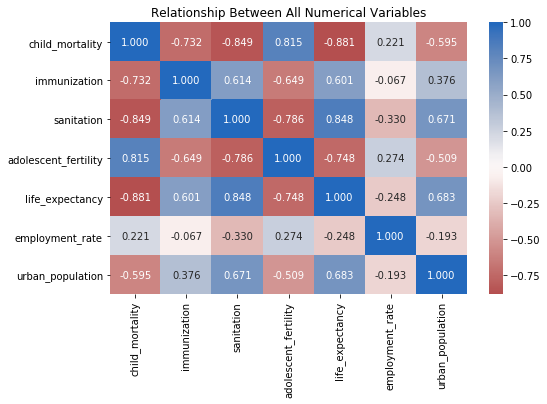

In [53]:
# correlation plot with heat map
plt.figure(figsize = [8, 5])
sb.heatmap(final_data[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Relationship Between All Numerical Variables');

From the heatmap, life expectancy, sanitation, and immunization all have the strongest negative correlation with child mortality in that order. Adolescent fertility on the other hand, has a strong possitive correlation with child mortality. Employment rate has a week correlation with child mortality. Urban population has a fair negative correlation with child mortality. These findings are quite in sync with ealier findings. Let me explore even further using the scatterplot matrix.

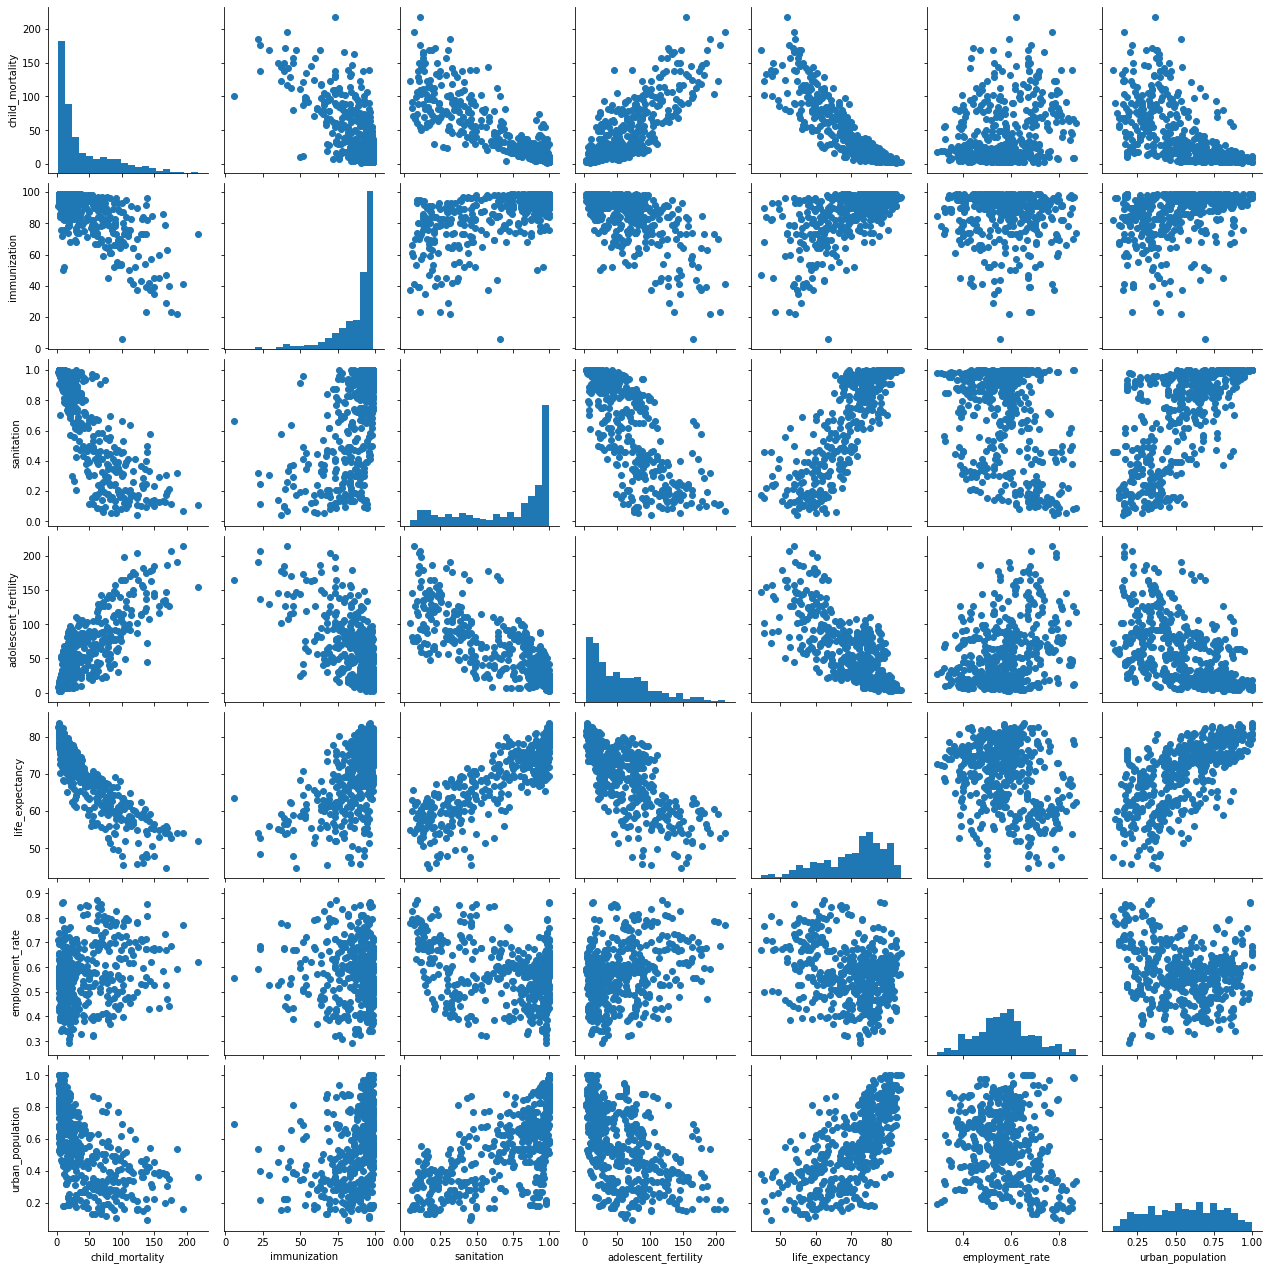

In [54]:
# scatterplot of all numeric variables

g = sb.PairGrid(data = data_sample, vars = numeric);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

data_sample = data_sample

What we see from the plots support our findings from the heatmap. Life expectancy, sanitation and immunization all have negative correlation with child mortality. Adolescent fertility rate correlate possitively with child mortality. Employment rate does not seem to have any strong relationship with any of the values. It is amazing to see that some numerical variables considered as secondary are having about the strongest correlation with child mortality.

Next, let me use the numerical variables with the strongest correlation (possitive and negative) to perform a multivariate exploration along with the categorical variables to see if there is something else I can notice.

First; adolescent_fertility vs child_mortality & life_expectancy.

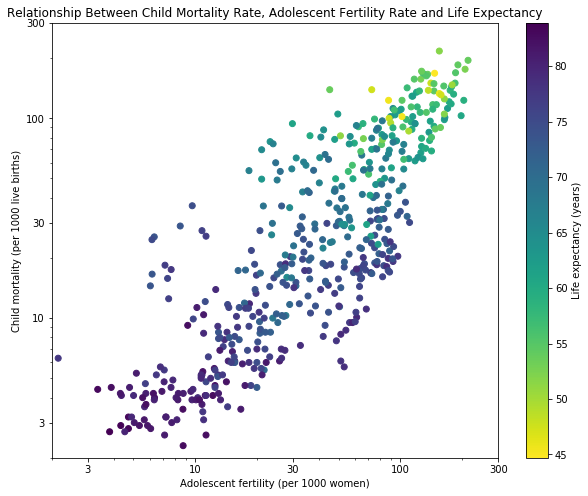

In [55]:
plt.figure(figsize = [10, 8])

plt.scatter(data = data_sample, x = 'adolescent_fertility', y = 'child_mortality',
           c = 'life_expectancy', cmap = 'viridis_r');
plt.colorbar(label = 'Life expectancy (years)');

ticks = [1, 3, 10, 30, 100, 300];
labels = ticks
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks, ticks);
plt.yticks(ticks, ticks);
plt.xlim(2, 300);
plt.ylim(2, 300);
plt.xlabel('Adolescent fertility (per 1000 women)');
plt.ylabel('Child mortality (per 1000 live births)');
plt.title('Relationship Between Child Mortality Rate, Adolescent Fertility Rate and Life Expectancy');

The pattern observed from the scatterplot shows low life expectancy at the top right of the plot (associated with high child mortality and adolecent fertility rates). High life expectancy is concentrated below 100 of adolescent fertility and below 30 of child mortality rates. There is a single point though below 30 of child mortality axis that indicates a lower life expectancy there. 

Finally, let me use a point plot to examine the categorical variables.

In [56]:
# Taking life expectancy values between 65 and 75
sub = (final_data['life_expectancy'] >= 65) & (final_data['life_expectancy'] <= 75)
sub_data = final_data.loc[sub,:]

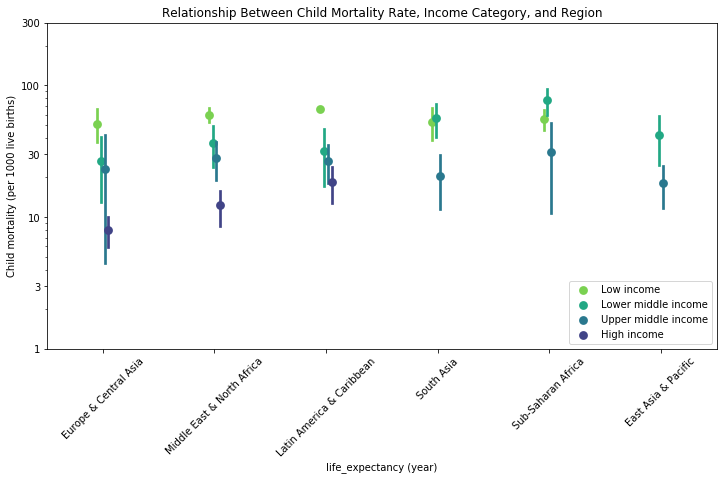

In [57]:
plt.figure(figsize = [12, 6]);
sb.pointplot(data = sub_data, x = 'region', y = 'child_mortality', hue = 'income_group', ci = 'sd', 
            linestyles = '', dodge = True, palette = 'viridis_r');
ticks = [1, 3, 10, 30, 100, 300]
labels = ticks
plt.yscale('log')
plt.yticks(ticks, labels)
plt.xlabel('life_expectancy (year)');
plt.ylabel('Child mortality (per 1000 live births)');
plt.title('Relationship Between Child Mortality Rate, Income Category, and Region');
plt.xticks(rotation = 45);
plt.legend(loc = 'lower right');

The point plot is made with a dodge feature so that we can see the respective positions of income levels in the plot. The trend seem to fall in place for almost all regions where ligh life expectancy is associated with low child mortality rate and vise versa. There are also some interesting findings. In South Asia, the mortality rate of lower middle income group is slightly higher than that of low income, and in Africa, the gap is a bit more. Also, the North America region is not in the plot. This is likely because the life expectancy of that region is generally higher than the selected mid-way range.  

At this point, I will end my exploration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I used a heat map, scatter and point plots to explore multiple variables. The observations largely reveal a strong correlation between child mortality, life expectancy, sanitation, adolescent fertility and income level. 

### Were there any interesting or surprising interactions between features?

It was surprising that employment rate does not have a strong relationship with any other numeric variable and that immunization does not correlate with urban population. It was also interesting to find a few variants as seen in the last two plots. Generally though, the correlation among variables have been consistent.

In [58]:
final_data.to_csv('final_data.csv', index = False)